# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK

# BATCH NO: DS2308

# Projects Evaluation Phase 3


# Census Income

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. 

## These are:

1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

# Dataset Link-

https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv



# import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Loading the dataset:

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
print("Here we will see the total rows and columns present in the datase........")
df.shape

Here we will see the total rows and columns present in the datase........


(32560, 15)

In [4]:
print("Here we will see the total columns named in the dataset..... ")
df.columns

Here we will see the total columns named in the dataset..... 


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Now we will see the missing value:

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Thus we can see that there is no null value we can go futher:

In [6]:
print("Here we will see the dataset information........")
df.info()

Here we will see the dataset information........
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Note: As the data are in the two form says numerical and categorical now i will seperate them foe the analysis:

In [7]:
numerical_columns = df.select_dtypes(include ='int').columns
numerical_columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

In [8]:
categorical_columns = df.select_dtypes(include = 'object').columns
categorical_columns

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

### Now we will see the any special charateres are present in the dataset.....

In [9]:
for i in df.columns:
    if df[i].dtypes =='object':
        print(i,'\n',df[i].value_counts())
        print('=='*10)

Workclass 
  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education 
  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
Marital_status 
  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation 
  Prof-specialty 

## observations: 
### as i can see the columns named ie, [Workclass,Occupation,Native_country] has the ? i will replace with the mode

In [10]:
replacing = ['Workclass','Occupation','Native_country']

for i in replacing:
    df[i].replace("?",df[i].mode()[0],inplace=True)

# Now will see the duplicated data in the dataset:

In [11]:
print("-------------Here are the duplicate data present in  the dataset-----------")
df.duplicated().sum()

-------------Here are the duplicate data present in  the dataset-----------


24

In [12]:
print("we can see the 24 duplicated data now we will drop the duplicate data-----------------")
df.drop_duplicates(inplace=True)
df.shape

we can see the 24 duplicated data now we will drop the duplicate data-----------------


(32536, 15)

# [Data_visualisation]:

Here we can see the categorical_columns garph---------------------


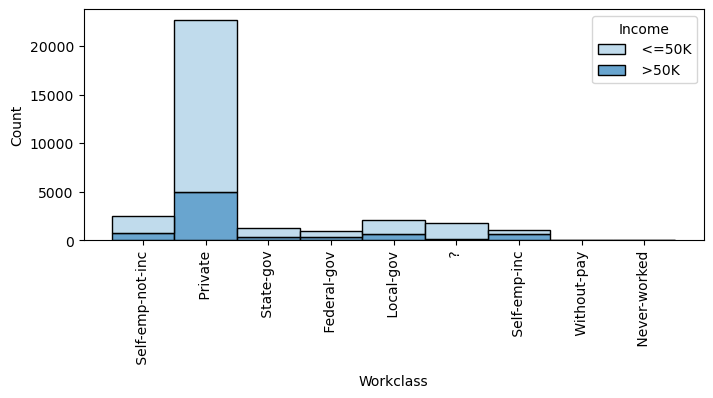

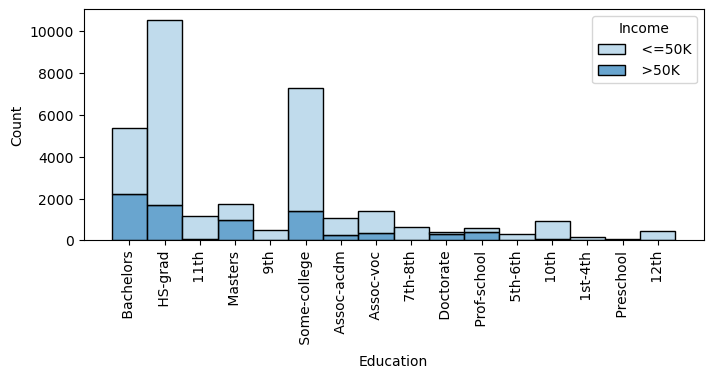

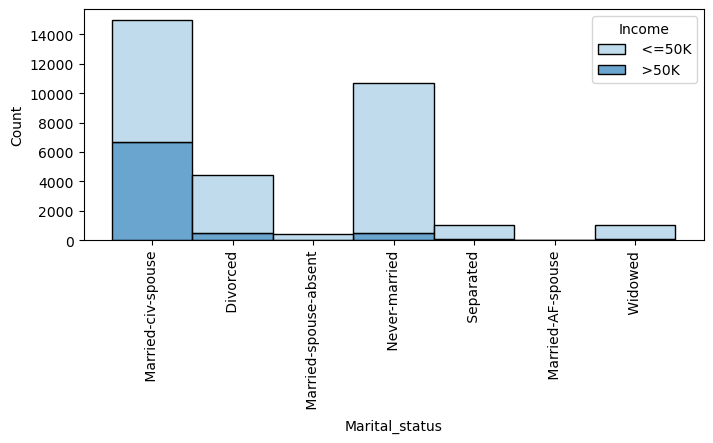

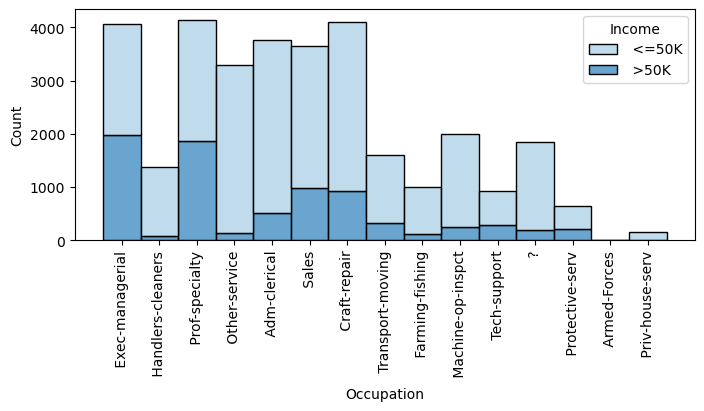

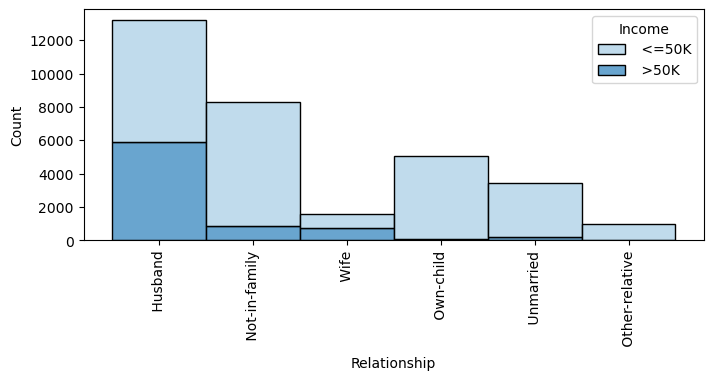

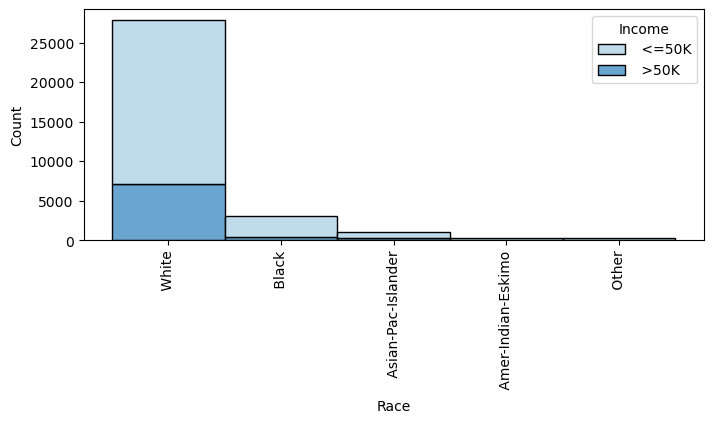

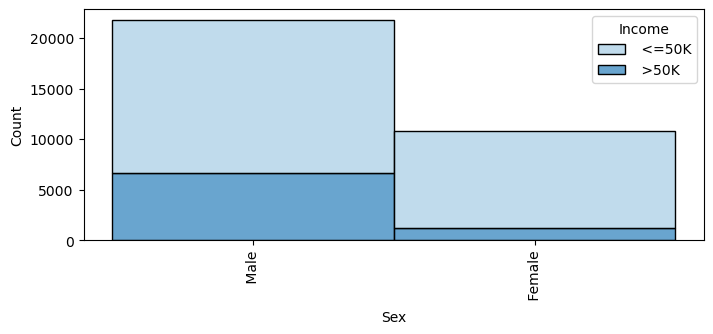

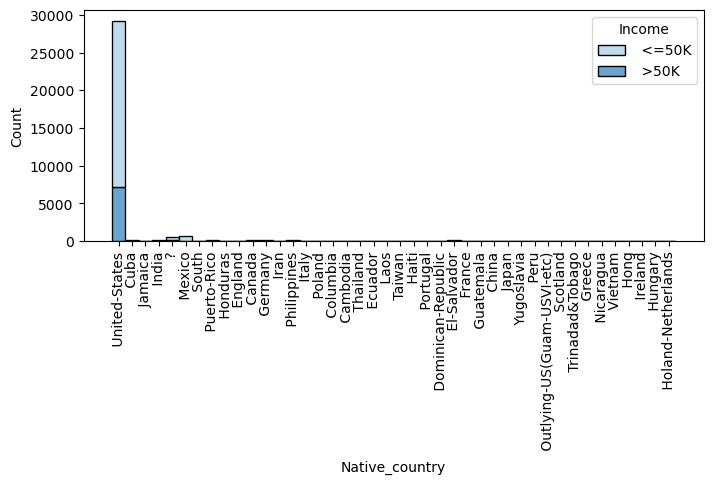

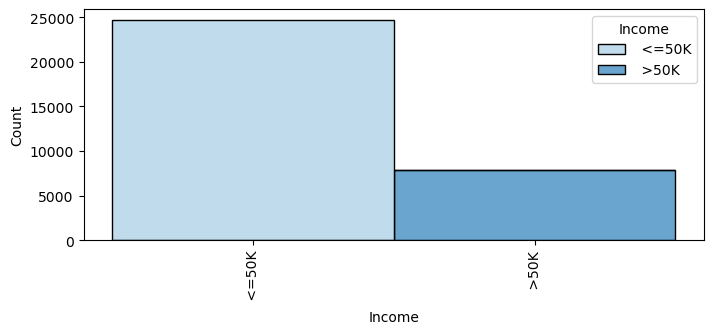

In [13]:
print("Here we can see the categorical_columns garph---------------------")
for i in categorical_columns:
    plt.figure(figsize=(8,3))
    sns.histplot(x=df[i],palette='Blues',multiple="stack",hue=df['Income'])
    plt.xticks(rotation=90)
    plt.show()

# Now we will use the [LableEncoder] for converting the categorical_columns to numerical_columns:

In [14]:
print("Here i will use the labelEncoder as le")
le = LabelEncoder()
le

Here i will use the labelEncoder as le


LabelEncoder()

In [15]:
i = df.select_dtypes(include="object").columns
i

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [16]:
for i in df.columns:
    df[i] = le.fit_transform(df[i].values.reshape(-1,1))

In [17]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


# Now we will see the skewness present in the dataset:

In [18]:
df.skew()

Age               0.554571
Workclass        -0.751854
Fnlwgt            0.063367
Education        -0.934180
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.114542
Relationship      0.786514
Race             -2.435283
Sex              -0.719400
Capital_gain      3.570576
Capital_loss      5.263914
Hours_per_week    0.070804
Native_country   -3.661060
Income            1.211640
dtype: float64

.........................Here are the graph of the dataskewness present in the dataset...................


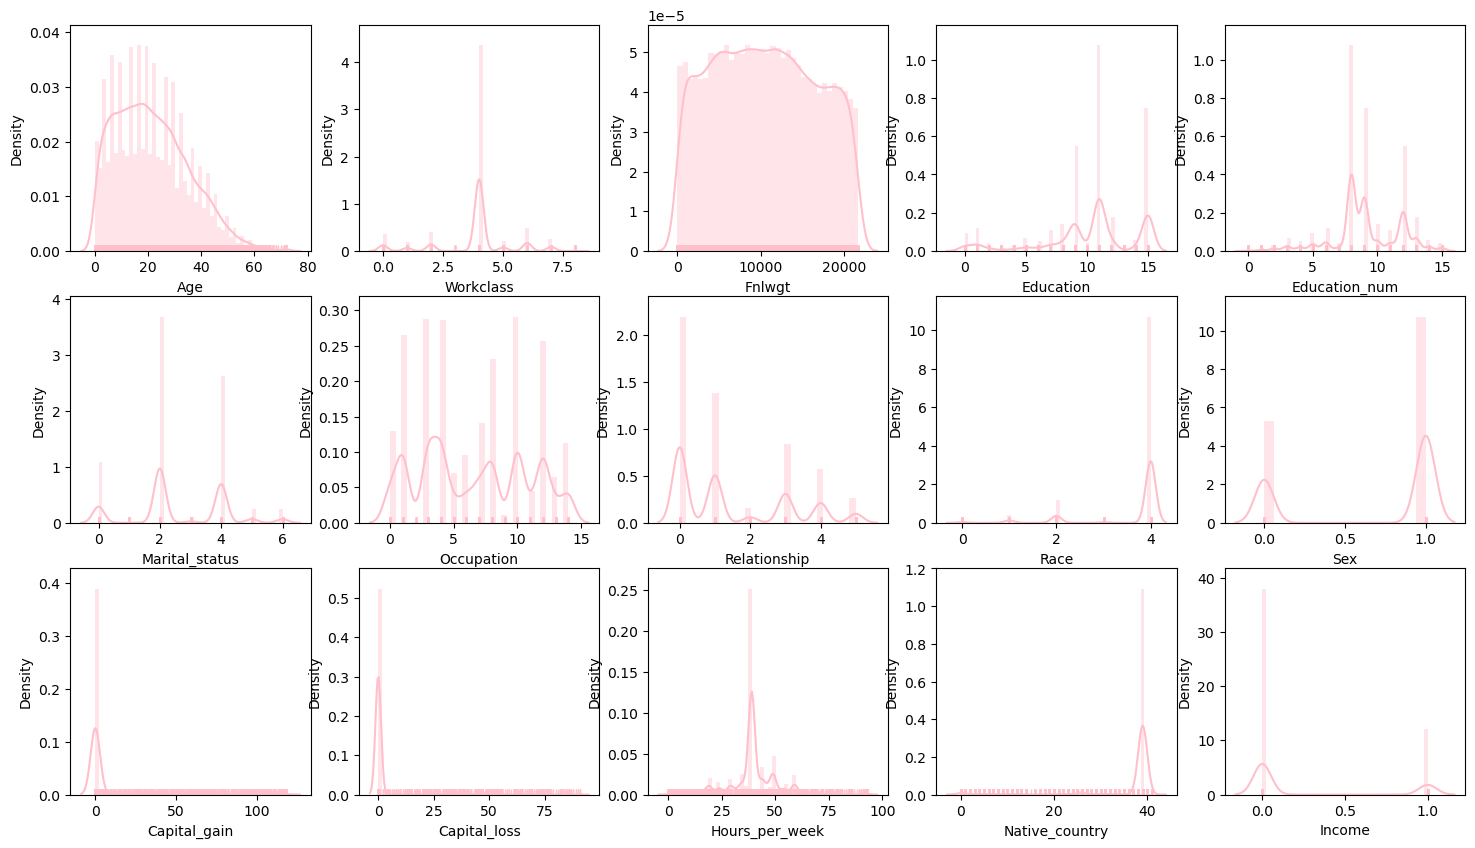

In [19]:
print(".........................Here are the graph of the dataskewness present in the dataset...................")

plt.figure(figsize=(18,10))
plot=1
for col in df:
    if plot<=15:
        plt.subplot(3,5,plot)
        sns.distplot(df[col],color='pink', rug=True)
        plt.xlabel(col)
        plot=plot+1
plt.show()

In [20]:
df.skew().sort_values(ascending = False)

Capital_loss      5.263914
Capital_gain      3.570576
Income            1.211640
Relationship      0.786514
Age               0.554571
Occupation        0.114542
Hours_per_week    0.070804
Fnlwgt            0.063367
Marital_status   -0.012692
Education_num    -0.309454
Sex              -0.719400
Workclass        -0.751854
Education        -0.934180
Race             -2.435283
Native_country   -3.661060
dtype: float64

# As per my observation the  skewness of the data with standard limit as +/-0.5.  i can go further for analysis without power_transform the data:

# Now we will detect the outliers present in the dataset......

In [21]:
print('Here i will kept the seprate columns named as outliers for the detection of outliers ..........')

outliers = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']
outliers

Here i will kept the seprate columns named as outliers for the detection of outliers ..........


['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

.........................Here we will see the boxplot for detections of outliers......................


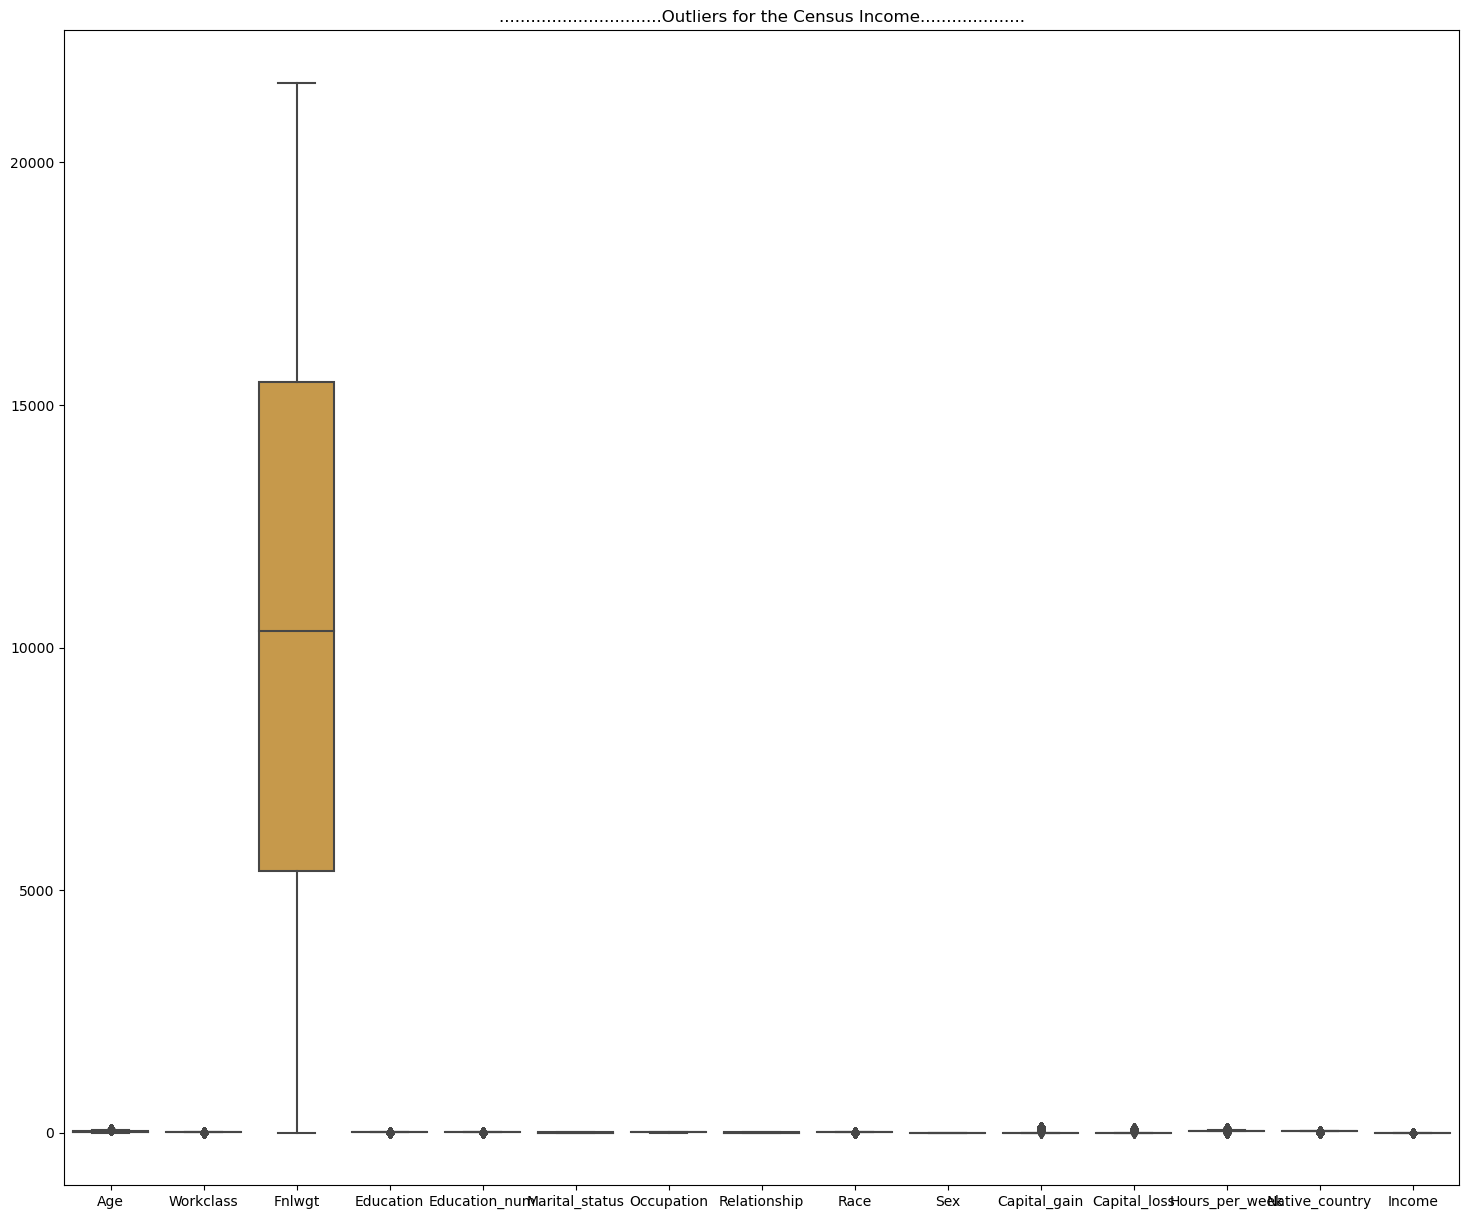

In [22]:
print(".........................Here we will see the boxplot for detections of outliers......................")

plt.figure(figsize=(18,15))
sns.boxplot(data=df[outliers],orient='b')
subplots=True
layout =(6,6)
plt.title("...............................Outliers for the Census Income....................")
plt.show()

# observation:
outliers are present in all columns except the columns 'Marital_status', 'Occupation', 'Relationship', 'Sex'. The categorical columns 'Work class', 'Education', 'Race', 'Native_country','Income' can be ignored.

# Now we have to removed the outliers:

In [23]:
z = np.abs(zscore(df))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.837352,1.463505,1.252081,0.335272,1.134817,0.405890,0.608366,0.900122,0.393692,0.703036,0.279108,0.204258,2.254802,0.291340,0.563389
1,0.042855,0.090200,0.593037,0.181506,0.420646,1.733664,0.135486,0.277868,0.393692,0.703036,0.279108,0.204258,0.031357,0.291340,0.563389
2,1.057404,0.090200,0.799704,2.402383,1.198377,0.405890,0.135486,0.900122,1.962450,0.703036,0.279108,0.204258,0.031357,0.291340,0.563389
3,0.776360,0.090200,1.464178,0.335272,1.134817,0.405890,0.810273,2.211146,1.962450,1.422403,0.279108,0.204258,0.031357,4.056085,0.563389
4,0.116205,0.090200,1.190552,0.439895,1.523683,0.405890,0.608366,2.211146,0.393692,1.422403,0.279108,0.204258,0.031357,0.291340,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849711,0.090200,0.996781,0.852050,0.745951,0.405890,1.519592,2.211146,0.393692,1.422403,0.279108,0.204258,0.196057,0.291340,0.563389
32556,0.103846,0.090200,0.399954,0.181506,0.420646,0.405890,0.100953,0.900122,0.393692,0.703036,0.279108,0.204258,0.031357,0.291340,1.774973
32557,1.424156,0.090200,0.432524,0.181506,0.420646,2.249657,1.317685,1.588892,0.393692,1.422403,0.279108,0.204258,0.031357,0.291340,0.563389
32558,1.216463,0.090200,0.393811,0.181506,0.420646,0.921884,1.317685,0.966639,0.393692,0.703036,0.279108,0.204258,1.678353,0.291340,0.563389


In [24]:
thresold = 3
df1= df[(z<3).all(axis=1)]

In [25]:
df1.shape

(26716, 15)

In [26]:
print("Here we can see the total number of data_loss ----------------")
data_loss = (df.shape[0]-df1.shape[0])/df.shape[0]*100
data_loss

Here we can see the total number of data_loss ----------------


17.887878042783377

# Now we keep the feature(X) and label(y) from the main dataset:

In [27]:
X = df.drop(columns = ['Income'])
y = df['Income']

In [28]:
X

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,10,4,16527,7,11,2,13,5,4,0,0,0,37,39
32556,23,4,8079,11,8,2,7,0,4,1,0,0,39,39
32557,41,4,7882,11,8,6,1,4,4,0,0,0,39,39
32558,5,4,12880,11,8,4,1,3,4,1,0,0,19,39


In [29]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32536, dtype: int32

# Train-test split:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# [Model Building]:

In [31]:
print("Here in models i will several model and select the best model as per its performance..............")

models = {'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier(),
    'XGBoost Classifier': XGBClassifier()}
models

Here in models i will several model and select the best model as per its performance..............


{'Logistic Regression': LogisticRegression(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Support Vector Classifier': SVC(),
 'Gradient Boosting Classifier': GradientBoostingClassifier(),
 'Decision Tree Classifier': DecisionTreeClassifier(),
 'Random Forest Classifier': RandomForestClassifier(),
 'AdaBoost Classifier': AdaBoostClassifier(),
 'Extra Trees Classifier': ExtraTreesClassifier(),
 'XGBoost Classifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               mi

In [32]:
print("Here the performance of the models.............")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy}")

Here the performance of the models.............
Logistic Regression - Accuracy: 0.7856484326982176
K-Nearest Neighbors - Accuracy: 0.7779655808236017
Support Vector Classifier - Accuracy: 0.7622925629993854
Gradient Boosting Classifier - Accuracy: 0.866318377381684
Decision Tree Classifier - Accuracy: 0.810540872771973
Random Forest Classifier - Accuracy: 0.8567916410571604
AdaBoost Classifier - Accuracy: 0.8624769514443762
Extra Trees Classifier - Accuracy: 0.8489551321450522
XGBoost Classifier - Accuracy: 0.8710817455439459


## Note: Based on the performance i would like to select 
[AdaBoost Classifier - Accuracy: 0.8624769514443762]

# Model Evaluation:

In [33]:
# Choose the best-performing model for further analysis
final_model = AdaBoostClassifier()
final_model

AdaBoostClassifier()

In [34]:
print('Fitting the model on the training data.............')
final_model.fit(X_train, y_train)


Fitting the model on the training data.............


AdaBoostClassifier()

In [35]:
print(" The result of Cross-validation is.....................")
cv_scores = cross_val_score(final_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

 The result of Cross-validation is.....................
Cross-Validation Scores: [0.85433313 0.8546181  0.86015061 0.86599047 0.86168741]
Mean CV Score: 0.8593559448861701


In [36]:
y_pred = final_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [37]:
print("Here are the confusion matrix............")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

Here are the confusion matrix............


array([[4682,  279],
       [ 616,  931]], dtype=int64)

In [38]:
print("Here are the classification report................")
classification_rep = classification_report(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Here are the classification report................
Confusion Matrix:
 [[4682  279]
 [ 616  931]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4961
           1       0.77      0.60      0.68      1547

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.86      0.86      0.86      6508



 ROC Curve and AUC Score graph.......................


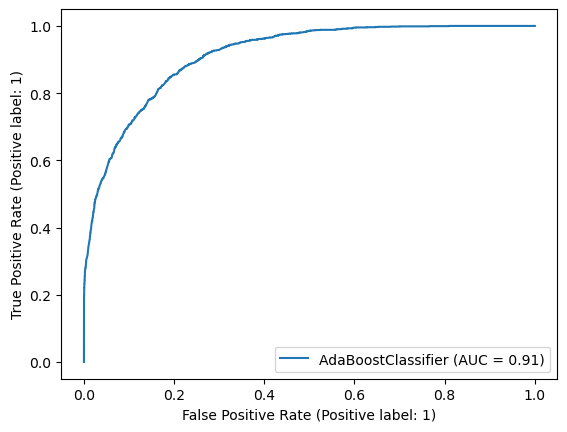

In [39]:
print(' ROC Curve and AUC Score graph.......................')
plot_roc_curve(final_model, X_test, y_test)
plt.show()


In [40]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.772785646595481


In [41]:
original = np.array(y_test)
original

array([0, 1, 0, ..., 0, 1, 1])

In [43]:
predicted = np.round(np.array(final_model.predict(X_test)), 0)
predicted

array([0, 0, 0, ..., 0, 0, 1])

In [44]:
print("Now i will create the seprate dataframe to store the orignial and predicted data.......")
income_prediction = pd.DataFrame({'Original':original,'Predicted Income Status':predicted}).T
income_prediction

Now i will create the seprate dataframe to store the orignial and predicted data.......


,0,1,2,3,4,5,6,7,8,9,...,6498,6499,6500,6501,6502,6503,6504,6505,6506,6507
Original,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,1
Predicted Income Status,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1


# [Saving the model]:

In [48]:
import pickle

In [49]:
filename = 'census_classification.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [ ]:
################################################THANK YOU#################################################################################________________________________________________________________________________